**Problem Statement**

---





A Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 




In [ ]:
!pip install catboost

     |████████████████████████████████| 65.9MB 44kB/s 


# Step 1 - Importing the required Libraries for the current project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# Step 2 - Importing the Dataset


In [ ]:
raw_data = pd.read_csv('/content/drive/My Drive/Data Science Projects/train.csv')
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Step 3 - Getting some information about the data

In [ ]:
description = raw_data.describe(include = 'all')
print(description)

         Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
count        614    601     611  ...     564.000000           614         614
unique       614      2       2  ...            NaN             3           2
top     LP001931   Male     Yes  ...            NaN     Semiurban           Y
freq           1    489     398  ...            NaN           233         422
mean         NaN    NaN     NaN  ...       0.842199           NaN         NaN
std          NaN    NaN     NaN  ...       0.364878           NaN         NaN
min          NaN    NaN     NaN  ...       0.000000           NaN         NaN
25%          NaN    NaN     NaN  ...       1.000000           NaN         NaN
50%          NaN    NaN     NaN  ...       1.000000           NaN         NaN
75%          NaN    NaN     NaN  ...       1.000000           NaN         NaN
max          NaN    NaN     NaN  ...       1.000000           NaN         NaN

[11 rows x 13 columns]


In [ ]:
print(raw_data['Loan_Status'].value_counts())
totalnull = raw_data.isnull().sum()
print(totalnull)

Y    422
N    192
Name: Loan_Status, dtype: int64
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print(raw_data['Gender'].unique())
print(raw_data['Married'].unique())
print(raw_data['Dependents'].unique())
print(raw_data['Education'].unique())
print(raw_data['Self_Employed'].unique())
print(raw_data['Loan_Amount_Term'].unique())
print(raw_data['Credit_History'].unique())
print(raw_data['Property_Area'].unique())
print(raw_data['Loan_Status'].unique())



['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ 1.  0. nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [ ]:
print(raw_data.groupby(['Gender']).Gender.count())
print(raw_data.groupby(['Married']).Married.count())
print(raw_data.groupby(['Dependents']).Dependents.count())
print(raw_data.groupby(['Education']).Education.count())
print(raw_data.groupby(['Self_Employed']).Self_Employed.count())
print(raw_data.groupby(['CoapplicantIncome']).CoapplicantIncome.count())
print(raw_data.groupby(['Loan_Amount_Term']).Loan_Amount_Term.count())
print(raw_data.groupby(['Credit_History']).Credit_History.count())
print(raw_data.groupby(['Property_Area']).Property_Area.count())

Gender
Female    112
Male      489
Name: Gender, dtype: int64
Married
No     213
Yes    398
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
CoapplicantIncome
0.000000        273
16.120001         1
189.000000        1
240.000000        1
242.000000        1
               ... 
10968.000000      1
11300.000000      1
20000.000000      2
33837.000000      1
41667.000000      1
Name: CoapplicantIncome, Length: 287, dtype: int64
Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: Loan_Amount_Term, dtype: int64
Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Property_Area, dtype: int64


**Observations**


*   We can clearly see that Dependent Variable i.e. Loan Status is unevenly spread.
*   There are many null values which needs to be dealt with.


#Step 4 - Encoding the Label/Categorical Data


In [ ]:
raw_data['Gender'] = raw_data['Gender'].map({'Male': 0, 'Female':1})
raw_data['Married'] = raw_data['Married'].map({'No': 0, 'Yes':1})
raw_data['Dependents'] = raw_data['Dependents'].map({'0':0, '1':1, '2':1, '3+':1})
raw_data['Education'] = raw_data['Education'].map({'Not Graduate': 0, 'Graduate':1})
raw_data['Self_Employed'] = raw_data['Self_Employed'].map({'No': 0, 'Yes':1})
raw_data['Property_Area'] = raw_data['Property_Area'].map({'Rural': 0, 'Semiurban':1, 'Urban':2})
raw_data['Loan_Status'] = raw_data['Loan_Status'].map({'Y':1, 'N':0})

# Step 5 - Taking care of missing data


In [ ]:
from sklearn.impute import SimpleImputer 
imputer_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_mean = SimpleImputer(missing_values = np.nan, strategy ='mean')

raw_data[['Gender' , 'Married', 'Dependents','Education', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area', 'Credit_History']] = imputer_mode.fit_transform(raw_data[['Gender' , 'Married','Education', 'Dependents', 'Self_Employed', 'Loan_Amount_Term','Property_Area', 'Credit_History']])
raw_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = imputer_mean.fit_transform(raw_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])


# Step 6 -  Visualizing and removing outlier values


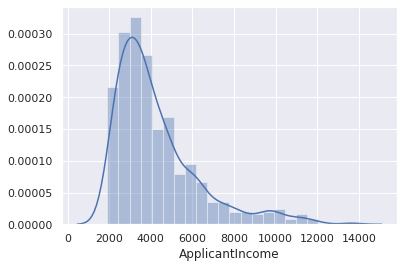

In [ ]:
sb.distplot(raw_data['ApplicantIncome'])
l = raw_data['ApplicantIncome'].quantile(0.05)
h = raw_data['ApplicantIncome'].quantile(0.95)
raw_data = raw_data[raw_data['ApplicantIncome']>l]
raw_data = raw_data[raw_data['ApplicantIncome']<h]

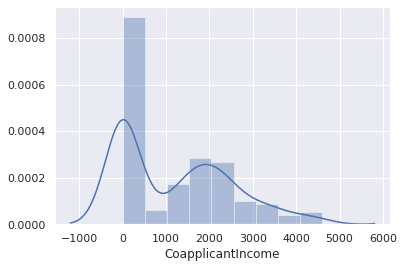

In [ ]:
sb.distplot(raw_data['CoapplicantIncome'])
l = raw_data['CoapplicantIncome'].quantile(0.02)
h = raw_data['CoapplicantIncome'].quantile(0.95)
raw_data = raw_data[raw_data['CoapplicantIncome']<h]

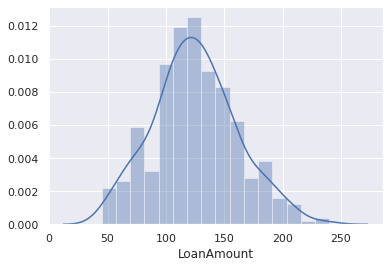

In [ ]:
sb.distplot(raw_data['LoanAmount'])
l = raw_data['LoanAmount'].quantile(0.02)
h = raw_data['LoanAmount'].quantile(0.95)
raw_data = raw_data[raw_data['LoanAmount']>l]
raw_data = raw_data[raw_data['LoanAmount']<h]

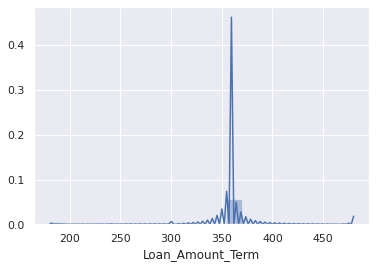

In [ ]:
sb.distplot(raw_data['Loan_Amount_Term'])
l = raw_data['Loan_Amount_Term'].quantile(0.01)
h = raw_data['Loan_Amount_Term'].quantile(0.99)
raw_data = raw_data[raw_data['Loan_Amount_Term']>l]

raw_data = raw_data.reset_index(drop=True)

# Step 7 -  Dividng dataset into Independent and Dependent Variables


In [ ]:
Y = raw_data.iloc[:, -1]
X = raw_data.iloc[:, 1:-1]

X = X.drop(columns=['ApplicantIncome','Loan_Amount_Term'], axis=1)

# Dropping two columns as part of Feature Engineering and Selection

# Step 8 - Dividing dataset into Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 9)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
39,0.0,1.0,1.0,0.0,0.0,2200.0,135.0,1.0,0.0
98,1.0,1.0,1.0,0.0,0.0,0.0,108.0,1.0,1.0
139,0.0,0.0,0.0,0.0,0.0,0.0,115.0,0.0,0.0
110,1.0,0.0,1.0,0.0,0.0,0.0,80.0,1.0,2.0
307,0.0,0.0,0.0,0.0,0.0,2042.0,126.0,1.0,0.0


# Step 9  - Encoding categorical data with OnehotEncoder


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [8])] , remainder = 'passthrough')
	#OnehotEncoder will be used for encodoing, this will be applied to index mentioned, remainder will remain as it is in the metrics

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Step 10  -  Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 11 - Creating and evaluating different Machine Learning Model

In [ ]:
#Logistic classifierression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 200)
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#SVM

from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel='linear', C = 1)
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#Kernal SVM (For Non-Linear Problems)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf' , C = 1, gamma= 0.1, random_state = 0)
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski' , p =2)
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy' , random_state=0)
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion= 'entropy' , random_state=0)
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier = classifier.fit(X_train, Y_train)


In [ ]:
#XGBoost

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier = classifier.fit(X_train, Y_train)


In [ ]:

#CatBoost

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier = classifier.fit(X_train, Y_train)


Learning rate set to 0.006126
0:	learn: 0.6892608	total: 49.6ms	remaining: 49.5s
1:	learn: 0.6858326	total: 50.3ms	remaining: 25.1s
2:	learn: 0.6822339	total: 51.3ms	remaining: 17s
3:	learn: 0.6787180	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6749143	total: 53.4ms	remaining: 10.6s
5:	learn: 0.6710514	total: 54.9ms	remaining: 9.09s
6:	learn: 0.6678438	total: 55.7ms	remaining: 7.9s
7:	learn: 0.6646664	total: 56.4ms	remaining: 6.99s
8:	learn: 0.6615639	total: 57ms	remaining: 6.27s
9:	learn: 0.6577270	total: 58.3ms	remaining: 5.77s
10:	learn: 0.6547166	total: 58.8ms	remaining: 5.29s
11:	learn: 0.6517487	total: 59.4ms	remaining: 4.89s
12:	learn: 0.6482430	total: 60.7ms	remaining: 4.61s
13:	learn: 0.6452987	total: 61.5ms	remaining: 4.33s
14:	learn: 0.6421007	total: 62.2ms	remaining: 4.08s
15:	learn: 0.6392903	total: 62.9ms	remaining: 3.87s
16:	learn: 0.6362813	total: 63.7ms	remaining: 3.68s
17:	learn: 0.6332792	total: 64.6ms	remaining: 3.52s
18:	learn: 0.6298823	total: 66ms	remaining: 3.41s

# Step 12 - Analysing the Results and Accuracy of Model


In [ ]:
yhat = classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()   #We need concentrate on getting this accuracy for test model

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6737879	total: 6.17ms	remaining: 1.02s
6:	learn: 0.6709638	total: 7.01ms	remaining: 994ms
7:	learn: 0.6682086	total: 7.69ms	remaining: 954ms
8:	learn: 0.6654918	total: 8.24ms	remaining: 907ms
9:	learn: 0.6621132	total: 9.61ms	remaining: 951ms
10:	learn: 0.6594723	total: 10.2ms	remaining: 914ms
11:	learn: 0.6568665	total: 10.7ms	remaining: 883ms
12:	learn: 0.6535708	total: 12.4ms	remaining: 941ms
13:	learn: 0.6509546	total: 13.2ms	remaining: 933ms
14:	learn: 0.6481490	total: 14ms	remaining: 917ms
15:	learn: 0.6456520	total: 14.6ms	remaining: 896ms
16:	learn: 0.6428122	total: 15.3ms	remaining: 885ms
17:	learn: 0.6402025	total: 16.3ms	remaining: 888ms
18:	learn: 0.6371646	total: 17.5ms	remaining: 904ms
19:	learn: 0.6348306	total: 18.1ms	remaining: 886ms
20:	learn: 0.6319131	total: 19.3ms	remaining: 901ms
21:	learn: 0.6288531	total: 20.7ms	remaining: 919ms
22:	learn: 0.6264478	total: 21.6ms	remaining: 920ms
23:	learn: 0.6239917

0.8177011494252874

In [ ]:
# Making the confusion matrix for Training Set

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yhat)

# Calculating Accuracy, Precision, Recall and F1-Score for Training Set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy =  accuracy_score(Y_test,yhat)                      #TP+TN/P+N
precision = precision_score(Y_test, yhat)                      #TP/TP+FP
recall =    recall_score(Y_test, yhat)                         #TP/TP+FN
f1 =        f1_score(Y_test, yhat)                             #2TP/(2TP+FP+FN)
report =    classification_report(Y_test, yhat)

print(cm)
print("Accuracy " , accuracy)
print(report)

[[ 7  9]
 [ 2 35]]
Accuracy  0.7924528301886793
              precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.80      0.95      0.86        37

    accuracy                           0.79        53
   macro avg       0.79      0.69      0.71        53
weighted avg       0.79      0.79      0.77        53



**Looking at Accuracies of different Machine Learning Model and Concluding the best accuracy.**

*   Logistic Regression Accuracy  = 0.8113207547169812
*   SVM Accuracy  0.8113207547169812
*   Kernel SVM Accuracy  0.8113207547169812
*   K-Nearest Neighbour Accuracy  0.7358490566037735
*   Decision Tree Accuracy  0.7169811320754716
*   Random Forest Accuracy  0.7169811320754716
*   Naive Bayes Accuracy  0.8113207547169812
*   XGBoost Accuracy  0.7169811320754716
*   CatBoost Accuracy  0.7924528301886793

**We can clearly conclude that Logistic Regression is the best fit for this particular problem as this is giving highest mean accuracy and test accuracy. **










